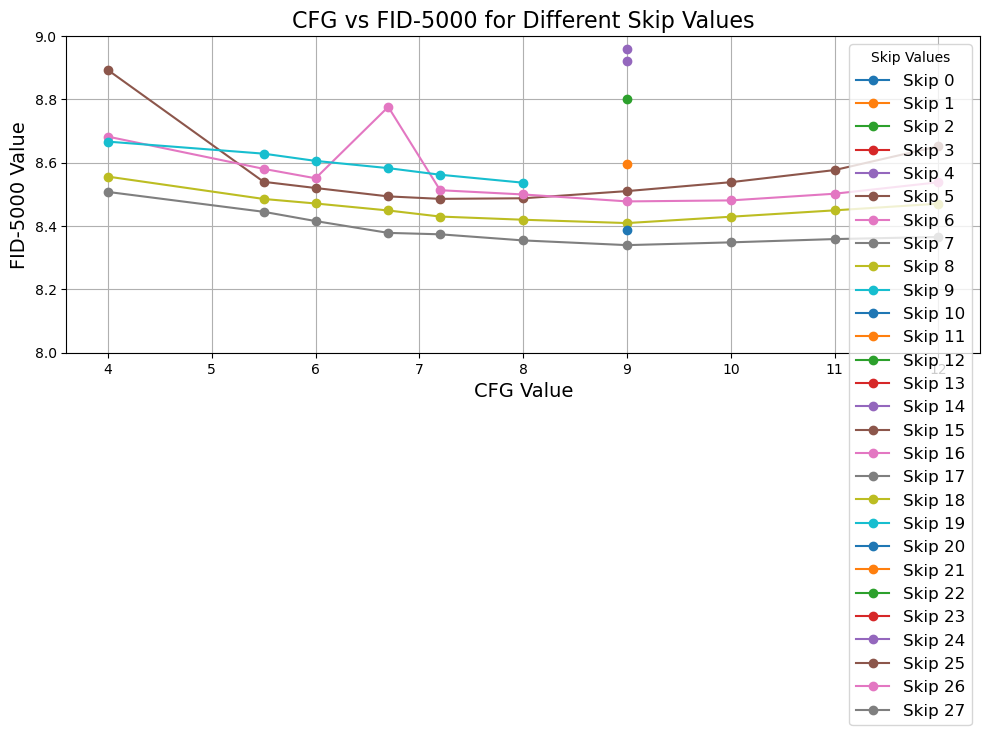

In [9]:
import matplotlib.pyplot as plt
import re

# Read the file
with open('skip-layer.txt', 'r') as file:
    lines = file.readlines()

# Parse the data
results = {}
pattern = r"Skip \[(\d+)\], CFG ([\d.]+), CFG Interval [\d.]+ -- FID-5000 ([\d.]+)"

for line in lines:
    match = re.match(pattern, line)
    if match:
        skip = int(match.group(1))
        cfg = float(match.group(2))
        fid = float(match.group(3))
        if skip not in results:
            results[skip] = {'cfg': [], 'fid': []}
        results[skip]['cfg'].append(cfg)
        results[skip]['fid'].append(fid)

# Plot the data
plt.figure(figsize=(10, 6))
plt.ylim(8,9)

for skip, data in sorted(results.items()):
    plt.plot(data['cfg'], data['fid'], marker='o', label=f"Skip {skip}")

plt.xlabel('CFG Value', fontsize=14)
plt.ylabel('FID-5000 Value', fontsize=14)
plt.title('CFG vs FID-5000 for Different Skip Values', fontsize=16)
plt.legend(title="Skip Values", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()
